# Team D 🧨- Group Assignment: Machine Learning 2
Team members:
- Alan Haro
- Adrian Ku
- Pedro Olivares
- Rita Orvalho
- Sergio Ospina
- Roberta Troccoli
- Moritz Zoepffel

## 0. Import libraries:

In [2]:
# We are importing all the libraries we are going to need since the beginning:
# Basic libraries:
import pandas as pd
pd.set_option('display.max_columns', 500) # this is to visualize all the columns
import numpy as np
import os

# Machine learning libraries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn import svm



# Graphic libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from itertools import product  # This tool is to create subplots

## 1. Data preprocessing:

In [3]:
# First, import the data and look for null values and data types:
raw_data = pd.read_csv("assignment_data/train.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [4]:
raw_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [5]:
data = raw_data
data = data.astype({
    "id": float,
    "Age": float,
    "DailyRate": float,
    "DistanceFromHome": float,
    "EmployeeCount": float,
    "HourlyRate": float,
    "MonthlyIncome": float,
    "MonthlyRate": float,
    "NumCompaniesWorked": float,
    "PercentSalaryHike": float,
    "StandardHours": float,
    "TotalWorkingYears": float,
    "TrainingTimesLastYear": float,
    "YearsAtCompany": float,
    "YearsInCurrentRole": float,
    "YearsSinceLastPromotion": float,
    "YearsWithCurrManager": float,
    "Attrition": bool
})

## 2. Exploratory Data Analysis:
In this section we are going to analyze how each of the different columns behave.

In [6]:
px.pie(data, names="Attrition", title="% of Attrition", template="none")

The first thing we can see is that the **attrition** class is imbalanced. This is something we will have to take into consideration once we start making the splits. Also for the scoring method this will also play a role.

### Categorical variables:
For this type of variables we are doing bar plots.

In [7]:
# For Education we have an outlier (value = 15), which only has one row, so we are removing this entree.
data = data[data['Education']!=15]

# The same happens for JobLevel
data = data[data['JobLevel']!=7]

In [8]:
cat_data = data.select_dtypes(["O","int64","bool"])

In [9]:
comb = product(list(range(3)),list(range(6)))
fig = make_subplots(rows=3, cols=6, subplot_titles=cat_data.columns[:-1])

for column,(row,col) in zip(cat_data.columns[:-1], comb):
    aux = cat_data.groupby([column]).agg({'Attrition': 'mean'})
    # aux.name = "value"
    fig.add_traces(px.bar(aux.reset_index(), x=column, y="Attrition", template="none")["data"], rows=row+1, cols=col+1)
    
fig.update_layout(title_text="Box Plots for % of Attrition per categorical variable", height=700, showlegend=False, template="none")

From the Categorical EDA we can see that the variable **Over 18** only has one value so we can drop it from the table.

### Numerical variables:

In [10]:
# For DailyRate we have one outlier with more than double the value, we are also removing it!
data = data[data['DailyRate']<=1500]

In [11]:
num_data = data.select_dtypes(["float"])
num_data["Attrition"] = data["Attrition"]
num_data.shape

(1674, 18)

In [12]:
comb = product(list(range(3)),list(range(6)))
fig = make_subplots(rows=3, cols=6, subplot_titles=num_data.columns[:-1])

for column,(row,col) in zip(num_data.columns[:-1], comb):
    fig.add_traces(px.box(num_data, x="Attrition", y=column, template="none")["data"], rows=row+1, cols=col+1)
    
fig.update_layout(title_text="Box Plots for numerical variables", height=400, showlegend=False, template="none")

We can notice that the columns **EmployeeCount** and **StandardHours** do not have any variation in the data, therefore we are going to remove them from the model as well. Another thing is that we have a lot of "T Rate" variables. We are adding a correlation matrix in order to see if thre is any redundant information.

<AxesSubplot:>

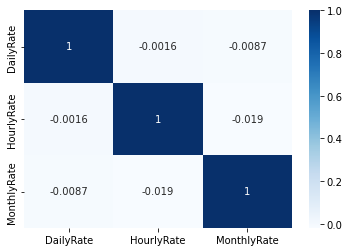

In [13]:
rate_data = num_data[['DailyRate', 'HourlyRate', 'MonthlyRate']]
corr = rate_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)


We see that for this variables, the correlation between them is close to zero. Therefore there is no clear linear dependence between this group of variables and we should not remove any of them. 

## 3. Data preparation:
In this section we are going to split the data into **train** and **test**. For all the methods, we are going to use **cross-validation** in order to choose the best model for each family of algorithms. However, we are splitting the data so we can later test and avoid overfitting. Because we are dealing with a highly imbalanced classification problem, the split should consider this in order to mantain similar proportions.

Also in this part we are going to do the One-Hot Encoding of the categorical variables.

In [14]:
drop_columns = ['id', 'Over18', 'EmployeeCount', 'StandardHours', 'Attrition']

As part of the feature selection we are removing the following columns (with explanation):
* `id`: it is just an index.
* `Over18`: there is only one value for this feature.
* `EmployeeCount`: there is no variation for this feature.
* `StandardHours`: there is no variation for this feature.

In [15]:
X = data.drop(columns=drop_columns)
y = data['Attrition'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1501)

We now check that the split mantains the same proportion of positive and negative **Attritions**.

In [16]:
all_ratio = y.sum()/len(y)
train_ratio = y_train.sum()/len(y_train)
test_ratio = y_test.sum()/len(y_test)

print(f"The original ratio was: {all_ratio} \n - the train ratio is: {train_ratio} \n - the test ratio is: {test_ratio}")

The original ratio was: 0.11947431302270012 
 - the train ratio is: 0.11870196413321947 
 - the test ratio is: 0.12127236580516898


Since the ratio are similar, we can go on with this split.

### Preprocessing:
We are one-hot encoding the categorical variables and standard scaling the numerical variables:

In [17]:
numeric_features = X_train.select_dtypes(["float"]).columns           # We keep the numeric columns names
categorical_features = X_train.select_dtypes(["O","int"]).columns     # We keep the categorical columns names

preprocess = ColumnTransformer(                                       # We preprocess the columns according to their type
    transformers=[
                ('num', StandardScaler(), numeric_features),    
                ('cat', OneHotEncoder(), categorical_features)
    ])

#### For train data:

In [18]:
# ONE HOT ENCODING:
X_train_cat = X_train[categorical_features]

# Apply OHE to the categorical variables
ohe = OneHotEncoder(sparse=False)
cat_data_ohe = ohe.fit_transform(X_train_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out())

# STANDARD SCALING:
X_train_num = X_train[numeric_features]

# Apply StandardScaler to the numeric features
scaler = StandardScaler()
num_data_scaled = pd.DataFrame(scaler.fit_transform(X_train_num))
num_data_scaled.columns = numeric_features

# Add said columns to the overall X matrix:
X_train_full = pd.concat([num_data_scaled, cat_data_ohe], axis=1)
column_order = X_train_full.columns

#### For test data:
We have to repeat the same procedure for the test data.

In [19]:
# fing categorical and numeric columns:
X_test_cat = X_test[categorical_features]
X_test_num = X_test[numeric_features]

# Apply OHE to categorical columns
cat_test_ohe = ohe.transform(X_test_cat)
cat_test_ohe = pd.DataFrame(cat_test_ohe, columns=ohe.get_feature_names_out())

# Apply stanrdadization also to the test
num_test_scaled = pd.DataFrame(scaler.transform(X_test_num))
num_test_scaled.columns = numeric_features

# join OHEed columns to the original X matrix
X_test_full = pd.concat([num_test_scaled, cat_test_ohe], axis=1)
X_test_full = X_test_full[column_order]

## 4. Model testing and evaluation:
We are now going to test for different models (each with different hyper-parameters) in order to evaluate their performance. At the end we are going to choose the one with the highest AUC-score. The models we are going to test are:
- Logistic Regression
- Random Forest
- XGBoost
- KNN
- SVM

### 4.1 Logistic Regression:

### Fitting the model:
We are going to fit the model and using `RandomizedSearchCV` we are going to select the best model to deploy. Once we have evaluated the best model we will select it and calculate the test score.

In [20]:
clf_logit = LogisticRegression(solver='liblinear', max_iter=1000)

parameters = {
    'penalty': ['l2', 'l1'],
    'C': np.logspace(-4,4,1000),
}

search_logit = RandomizedSearchCV(
    clf_logit,                               # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=parameters,          # this is the predefinad search space
    scoring="roc_auc",                       # the metric we want the tuner calculates in order to select the best combination
    cv=5,                                    # the cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    refit=True,                              # if we want to fit again the model on the best hyp. setting found after the process
    n_jobs=-1,                               # this is to indicate the operative system to use all processor cores and speed up the process,
    return_train_score=True,                 # is we want the tuner also return the scores on training (not just in validation)
    random_state=1501,                       # We fix the seed so it can be later reproduced
    n_iter=100                               # the number of attempts we want to perform
)

In [21]:
%%time
# Fit the model:
search_logit.fit(X_train_full, y_train)

Wall time: 4.83 s


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04,...
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04]),
                                        'penalty': ['l2', 'l1']},
                   random_state=1501, return_train_score=True,
                   scoring='roc_auc')

#### Selecting the best model:

In [22]:
# We are saving the results of the RandomizedSearch into a DataFrame:
results = pd.DataFrame(search_logit.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)      # We sort in order to have the best scores first
results.head().T.loc[['params', 'mean_test_score'],:]                  # We show the top 5 models and display the parameters and score
best_params_logit = results.loc[0, 'params']

#### Test Evaluation:
Now that we have the best model from the `RandomizedSearchCV`we calculate the **AUC-score** with the test set. This is in order to compare the final version with the other models and select the best.

In [23]:
pred_logit = search_logit.predict(X_test_full)
probas_logit = search_logit.predict_proba(X_test_full)

precision_test_logit = precision_score(y_test, pred_logit, pos_label=1)
recall_test_logit = recall_score(y_test, pred_logit, pos_label=1)
f1_test_logit = f1_score(y_test, pred_logit, pos_label=1)
roc_auc_test_logit = roc_auc_score(y_test, probas_logit[:,1])

print(f"Test Precision: {round(precision_test_logit,3)}")
print(f"Test Recall: {round(recall_test_logit,3)}")
print(f"Test F1: {round(f1_test_logit,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_logit,3)}")

Test Precision: 0.652
Test Recall: 0.246
Test F1: 0.357
Test ROC_AUC: 0.854


In [26]:
# try handling the imbalance with enn
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_enn, y_train_enn = enn.fit_resample(X_train_full, y_train)

In [27]:
# try lazy classifier
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_enn, X_test_full, y_train_enn, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 18.20it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.83,0.75,0.75,0.85,0.01
BernoulliNB,0.79,0.74,0.74,0.82,0.01
NearestCentroid,0.69,0.73,0.73,0.75,0.01
GaussianNB,0.68,0.72,0.72,0.74,0.01
SGDClassifier,0.83,0.70,0.70,0.84,0.01
LinearSVC,0.87,0.69,0.69,0.87,0.08
AdaBoostClassifier,0.87,0.68,0.68,0.87,0.11
LogisticRegression,0.86,0.68,0.68,0.86,0.02
LinearDiscriminantAnalysis,0.86,0.68,0.68,0.86,0.03


In [28]:
# try with bernoulli nb
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_enn, y_train_enn)
pred = clf.predict(X_test_full)
probas = clf.predict_proba(X_test_full)

In [29]:
# get the scores
precision_test = precision_score(y_test, pred, pos_label=1)
recall_test = recall_score(y_test, pred, pos_label=1)
f1_test = f1_score(y_test, pred, pos_label=1)
roc_auc_test = roc_auc_score(y_test, probas[:,1])
print(precision_test, recall_test, f1_test, roc_auc_test)

0.3203125 0.6721311475409836 0.4338624338624339 0.812662265410578


In [38]:
# try optimizing the bernoulli nb with gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
parameters = {
    'alpha': np.logspace(-1,1,1000),
    'binarize': np.linspace(0,.5,100),
    'fit_prior': [True]
}
grid_search = GridSearchCV(clf, parameters, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train_enn, y_train_enn)
grid_search.best_params_

Fitting 3 folds for each of 100000 candidates, totalling 300000 fits


{'alpha': 6.483534286054724, 'binarize': 0.196969696969697, 'fit_prior': True}

In [39]:
# get the scores
pred = grid_search.predict(X_test_full)
probas = grid_search.predict_proba(X_test_full)
precision_test = precision_score(y_test, pred, pos_label=1)
recall_test = recall_score(y_test, pred, pos_label=1)
f1_test = f1_score(y_test, pred, pos_label=1)
roc_auc_test = roc_auc_score(y_test, probas[:,1])
print(precision_test, recall_test, f1_test, roc_auc_test)

0.35344827586206895 0.6721311475409836 0.463276836158192 0.8218974853497515


In [ ]:
# try with gaussian nb
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_enn, y_train_enn)
pred_gnb = clf_gnb.predict(X_test_full)
probas_gnb = clf_gnb.predict_proba(X_test_full)

In [ ]:
#get the scores
precision_test_gnb = precision_score(y_test, pred_gnb, pos_label=1)
recall_test_gnb = recall_score(y_test, pred_gnb, pos_label=1)
f1_test_gnb = f1_score(y_test, pred_gnb, pos_label=1)
roc_auc_test_gnb = roc_auc_score(y_test, probas_gnb[:,1])
print(f"Test Precision: {round(precision_test_gnb,3)}")
print(f"Test Recall: {round(recall_test_gnb,3)}")
print(f"Test F1: {round(f1_test_gnb,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_gnb,3)}")

Test Precision: 0.245
Test Recall: 0.77
Test F1: 0.372
Test ROC_AUC: 0.781


In [ ]:
# try with logistic regression
clf_logit = LogisticRegression(solver='liblinear', max_iter=1000)
clf_logit.fit(X_train_enn, y_train_enn)
pred_logit = clf_logit.predict(X_test_full)
probas_logit = clf_logit.predict_proba(X_test_full)

In [ ]:
# try optimizing the logistic regression with gridsearch
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty': ['l2', 'l1'],
    'C': np.logspace(-4,4,1000),
}
grid_search = GridSearchCV(clf_logit, parameters, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1, refit=True).fit(X_train_enn, y_train_enn)
print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
{'C': 0.22664980792736927, 'penalty': 'l2'} 0.8445198011864677


In [ ]:
#best model 
best_lr = grid_search.best_estimator_
pred_best_lr = best_lr.predict(X_test_full)
probas_best_lr = best_lr.predict_proba(X_test_full)

In [ ]:
# get the scores
precision_test_best_lr = precision_score(y_test, pred_best_lr, pos_label=1)
recall_test_best_lr = recall_score(y_test, pred_best_lr, pos_label=1)
f1_test_best_lr = f1_score(y_test, pred_best_lr, pos_label=1)
roc_auc_test_best_lr = roc_auc_score(y_test, probas_best_lr[:,1])
print(precision_test_best_lr, recall_test_best_lr, f1_test_best_lr, roc_auc_test_best_lr)

0.5102040816326531 0.4098360655737705 0.45454545454545453 0.8542022105185074


In [ ]:
# try with sgd 
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss='log', max_iter=1000)
clf_sgd.fit(X_train_enn, y_train_enn)
pred_sgd = clf_sgd.predict(X_test_full)
probas_sgd = clf_sgd.predict_proba(X_test_full)

In [ ]:
# get the scores
precision_test_sgd = precision_score(y_test, pred_sgd, pos_label=1)
recall_test_sgd = recall_score(y_test, pred_sgd, pos_label=1)
f1_test_sgd = f1_score(y_test, pred_sgd, pos_label=1)
roc_auc_test_sgd = roc_auc_score(y_test, probas_sgd[:,1])
print(precision_test_sgd, recall_test_sgd, f1_test_sgd, roc_auc_test_sgd)

0.4716981132075472 0.4098360655737705 0.43859649122807015 0.8243453749721831


In [ ]:
#try optimizing the sgd with gridsearch
parameters = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-4,4,1000),
}
grid_search = GridSearchCV(clf_sgd, parameters, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1, refit=True).fit(X_train_enn, y_train_enn)
print(grid_search.best_params_, grid_search.best_score_)
best_sgd = grid_search.best_estimator_
pred_best_sgd = best_sgd.predict(X_test_full)
probas_best_sgd = best_sgd.predict_proba(X_test_full)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
{'alpha': 0.0037807466635993493, 'penalty': 'elasticnet'} 0.8473865640532307


In [ ]:
# get the scores
precision_test_best_sgd = precision_score(y_test, pred_best_sgd, pos_label=1)
recall_test_best_sgd = recall_score(y_test, pred_best_sgd, pos_label=1)
f1_test_best_sgd = f1_score(y_test, pred_best_sgd, pos_label=1)
roc_auc_test_best_sgd = roc_auc_score(y_test, probas_best_sgd[:,1])
print(precision_test_best_sgd, recall_test_best_sgd, f1_test_best_sgd, roc_auc_test_best_sgd)

0.5238095238095238 0.36065573770491804 0.42718446601941745 0.8542392997552111


In [ ]:
# try with svc
from sklearn.svm import SVC
clf_svc = SVC(probability=True)
clf_svc.fit(X_train_enn, y_train_enn)
pred_svc = clf_svc.predict(X_test_full)
probas_svc = clf_svc.predict_proba(X_test_full)

In [ ]:
# get the scores
precision_test_svc = precision_score(y_test, pred_svc, pos_label=1)
recall_test_svc = recall_score(y_test, pred_svc, pos_label=1)
f1_test_svc = f1_score(y_test, pred_svc, pos_label=1)
roc_auc_test_svc = roc_auc_score(y_test, probas_svc[:,1])
print(precision_test_svc, recall_test_svc, f1_test_svc, roc_auc_test_svc)

0.65 0.21311475409836064 0.32098765432098764 0.8245679103924042


In [ ]:
# try optimizing the svc with gridsearch
parameters = {
    'C': np.logspace(-1,1,100),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4,5],
    'gamma': ['scale', 'auto'],
}
grid_search = GridSearchCV(clf_svc, parameters, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1, refit=True).fit(X_train_enn, y_train_enn)
print(grid_search.best_params_, grid_search.best_score_)
best_svc = grid_search.best_estimator_
pred_best_svc = best_svc.predict(X_test_full)
probas_best_svc = best_svc.predict_proba(X_test_full)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


In [ ]:
# try lazy predict with original data
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_full, X_test_full, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.27it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.83,0.75,0.75,0.85,0.01
NearestCentroid,0.72,0.73,0.73,0.76,0.01
GaussianNB,0.70,0.72,0.72,0.75,0.01
Perceptron,0.85,0.68,0.68,0.85,0.01
PassiveAggressiveClassifier,0.87,0.64,0.64,0.86,0.01
LinearDiscriminantAnalysis,0.88,0.64,0.64,0.87,0.02
LogisticRegression,0.88,0.64,0.64,0.87,0.02
AdaBoostClassifier,0.88,0.63,0.63,0.87,0.11
XGBClassifier,0.88,0.63,0.63,0.87,0.12


### 4.2 Random Forest:

### Fitting the model:
We are going to fit the model and using `RandomizedSearchCV` we are going to select the best model to deploy. Once we have evaluated the best model we will select it and calculate the test score.

In [ ]:
clf_rf = RandomForestClassifier()

parameters = {
    'n_estimators': [5, 10, 30, 100, 300],   # number of trees to consider
    'max_depth': [None, 5, 10, 20, 30],      # max depth for the trees
    'max_features': ['auto'],                # number of max features to consider, this is sqrt(n)
    'min_samples_leaf': [1, 2, 3, 4, 5]      # min number of leaves per level
}

search_rf = RandomizedSearchCV(
    clf_rf,                               # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=parameters,          # this is the predefinad search space
    scoring="roc_auc",                       # the metric we want the tuner calculates in order to select the best combination
    cv=5,                                    # the cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    refit=True,                              # if we want to fit again the model on the best hyp. setting found after the process
    n_jobs=-1,                               # this is to indicate the operative system to use all processor cores and speed up the process,
    return_train_score=True,                 # is we want the tuner also return the scores on training (not just in validation)
    random_state=1501,                       # We fix the seed so it can be later reproduced
    n_iter=100                               # the number of attempts we want to perform
)

In [ ]:
%%time
# Fit the model:
search_rf.fit(X_train_full, y_train)

CPU times: total: 1.31 s
Wall time: 17.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [5, 10, 30, 100, 300]},
                   random_state=1501, return_train_score=True,
                   scoring='roc_auc')

#### Selecting the best model:

In [ ]:
# We are saving the results of the RandomizedSearch into a DataFrame:
results = pd.DataFrame(search_rf.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)      # We sort in order to have the best scores first
results.head().T.loc[['params', 'mean_test_score'],:]                  # We show the top 5 models and display the parameters and score
best_params = results.loc[0, 'params']

#### Test Evaluation:
Now that we have the best model from the `RandomizedSearchCV`we calculate the **AUC-score** with the test set. This is in order to compare the final version with the other models and select the best.

In [ ]:
pred_rf = search_rf.predict(X_test_full)
probas_rf = search_rf.predict_proba(X_test_full)

precision_test_rf = precision_score(y_test, pred_rf, pos_label=1)
recall_test_rf = recall_score(y_test, pred_rf, pos_label=1)
f1_test_rf = f1_score(y_test, pred_rf, pos_label=1)
roc_auc_test_rf = roc_auc_score(y_test, probas_rf[:,1])

print(f"Test Precision: {round(precision_test_rf,3)}")
print(f"Test Recall: {round(recall_test_rf,3)}")
print(f"Test F1: {round(f1_test_rf,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_rf,3)}")

Test Precision: 0.714
Test Recall: 0.082
Test F1: 0.147
Test ROC_AUC: 0.844


#### BONUS: Feature importance
Given that we are using a decission tree based algorithm, we are able to see the feature importance of the model.

In [ ]:
# We fit the model we kept:
clf_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                min_samples_leaf=best_params['min_samples_leaf'],
                                max_features=best_params['max_features'],
                                max_depth=best_params['max_depth']
                               )
clf_rf.fit(X_train_full, y_train)

# We extract the importances:
importances = clf_rf.feature_importances_
df_importances = pd.DataFrame({'column': X_train_full.columns, 'importances': importances})
df_imp_top10 = df_importances.sort_values('importances', ascending=False).head(10)

print(f"The top 10 most important features explain {df_imp_top10['importances'].sum():.2%} of the Attrition")
df_imp_top10

The top 10 most important features explain 45.69% of the Attrition


,column,importances
4,MonthlyIncome,0.068604
0,Age,0.058859
70,StockOptionLevel_0,0.049704
8,TotalWorkingYears,0.043356
10,YearsAtCompany,0.042403
5,MonthlyRate,0.041241
3,HourlyRate,0.040343
1,DailyRate,0.038470
11,YearsInCurrentRole,0.037476
2,DistanceFromHome,0.036422


From this we can see that the most important feature for explaining the model is the `MonthlyIncome`, followed by the `Age` on second place and `StockOptionLevel_0` (whether they have stocks) in third place.

### 4.3 XGBoost:

### Fitting the model:
We are going to fit the model and using `RandomizedSearchCV` we are going to select the best model to deploy. Once we have evaluated the best model we will select it and calculate the test score.

In [ ]:
clf_xgb = xgb.XGBClassifier()

parameters = {
    'n_estimators': [5, 10, 30, 100, 300],   # number of trees to consider
    'max_depth': [None, 5, 10, 20, 30],      # max depth for the trees
    'max_leaves': [1, 2, 3, 4, 5]            # max number of leaves per level
}

search_xgb = RandomizedSearchCV(
    clf_xgb,                                 # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=parameters,          # this is the predefinad search space
    scoring="roc_auc",                       # the metric we want the tuner calculates in order to select the best combination
    cv=5,                                    # the cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    refit=True,                              # if we want to fit again the model on the best hyp. setting found after the process
    n_jobs=-1,                               # this is to indicate the operative system to use all processor cores and speed up the process,
    return_train_score=True,                 # is we want the tuner also return the scores on training (not just in validation)
    random_state=1501,                       # We fix the seed so it can be later reproduced
    n_iter=100                               # the number of attempts we want to perform
)

In [ ]:
%%time
# Fit the model:
search_xgb.fit(X_train_full, y_train)

CPU times: total: 1.83 s
Wall time: 36 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

#### Selecting the best model:

In [ ]:
# We are saving the results of the RandomizedSearch into a DataFrame:
results = pd.DataFrame(search_xgb.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)      # We sort in order to have the best scores first
best_params = results.loc[0, 'params']                                 # We keep the best model parameters in case we want to refit
results.head().T.loc[['params', 'mean_test_score'],:]                  # We show the top 5 models and display the parameters and score


,86,47,48,60,21
params,"{'n_estimators': 30, 'max_leaves': 1, 'max_dep...","{'n_estimators': 30, 'max_leaves': 5, 'max_dep...","{'n_estimators': 30, 'max_leaves': 5, 'max_dep...","{'n_estimators': 30, 'max_leaves': 4, 'max_dep...","{'n_estimators': 30, 'max_leaves': 1, 'max_dep..."
mean_test_score,0.791927,0.791927,0.791927,0.791927,0.791927


#### Test Evaluation:
Now that we have the best model from the `RandomizedSearchCV`we calculate the **AUC-score** with the test set. This is in order to compare the final version with the other models and select the best.

In [ ]:
pred_xgb = search_xgb.predict(X_test_full)
probas_xgb = search_xgb.predict_proba(X_test_full)

precision_test_xgb = precision_score(y_test, pred_xgb, pos_label=1)
recall_test_xgb = recall_score(y_test, pred_xgb, pos_label=1)
f1_test_xgb = f1_score(y_test, pred_xgb, pos_label=1)
roc_auc_test_xgb = roc_auc_score(y_test, probas_xgb[:,1])

print(f"Test Precision: {round(precision_test_xgb,3)}")
print(f"Test Recall: {round(recall_test_xgb,3)}")
print(f"Test F1: {round(f1_test_xgb,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_xgb,3)}")

Test Precision: 0.542
Test Recall: 0.213
Test F1: 0.306
Test ROC_AUC: 0.813


### 4.4 KNN:

### Fitting the model:
We are going to fit the model and using `RandomizedSearchCV` we are going to select the best model to deploy. Once we have evaluated the best model we will select it and calculate the test score.

In [ ]:
clf_knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20],         # number of neighbors to consider
    'weights': ['uniform', 'distance'],      # 'uniform' evaluates all similar, 'distance' uses the inverse of the distance
}

search_knn = RandomizedSearchCV(
    clf_knn,                                 # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=parameters,          # this is the predefinad search space
    scoring="roc_auc",                       # the metric we want the tuner calculates in order to select the best combination
    cv=5,                                    # the cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    refit=True,                              # if we want to fit again the model on the best hyp. setting found after the process
    n_jobs=-1,                               # this is to indicate the operative system to use all processor cores and speed up the process,
    return_train_score=True,                 # is we want the tuner also return the scores on training (not just in validation)
    random_state=1501,                       # We fix the seed so it can be later reproduced
    n_iter=100                               # the number of attempts we want to perform
)

In [ ]:
%%time
# Fit the model:
search_knn.fit(X_train_full, y_train)

C:\Users\ahesc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.



CPU times: total: 328 ms
Wall time: 785 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 20],
                                        'weights': ['uniform', 'distance']},
                   random_state=1501, return_train_score=True,
                   scoring='roc_auc')

#### Selecting the best model:

In [ ]:
# We are saving the results of the RandomizedSearch into a DataFrame:
results = pd.DataFrame(search_knn.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)      # We sort in order to have the best scores first
best_params = results.loc[0, 'params']                                 # We keep the best model parameters in case we want to refit
results.head().T.loc[['params', 'mean_test_score'],:]                  # We show the top 5 models and display the parameters and score


,19,18,15,17,13
params,"{'weights': 'distance', 'n_neighbors': 20}","{'weights': 'uniform', 'n_neighbors': 20}","{'weights': 'distance', 'n_neighbors': 9}","{'weights': 'distance', 'n_neighbors': 10}","{'weights': 'distance', 'n_neighbors': 8}"
mean_test_score,0.693726,0.691354,0.652692,0.651358,0.650607


#### Test Evaluation:
Now that we have the best model from the `RandomizedSearchCV`we calculate the **AUC-score** with the test set. This is in order to compare the final version with the other models and select the best.

In [ ]:
pred_knn = search_knn.predict(X_test_full)
probas_knn = search_knn.predict_proba(X_test_full)

precision_test_knn = precision_score(y_test, pred_knn, pos_label=1)
recall_test_knn = recall_score(y_test, pred_knn, pos_label=1)
f1_test_knn = f1_score(y_test, pred_knn, pos_label=1)
roc_auc_test_knn = roc_auc_score(y_test, probas_knn[:,1])

print(f"Test Precision: {round(precision_test_knn,3)}")
print(f"Test Recall: {round(recall_test_knn,3)}")
print(f"Test F1: {round(f1_test_knn,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_knn,3)}")

Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0
Test ROC_AUC: 0.751


C:\Users\ahesc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### 4.5 SVM:

### Fitting the model:
We are going to fit the model and using `RandomizedSearchCV` we are going to select the best model to deploy. Once we have evaluated the best model we will select it and calculate the test score.

In [ ]:
clf_svm = svm.SVC() 

parameters = {
    'C': np.logspace(-4, 4, 1000),           # regularization parameter, adding 1000 in a log-scale
    'kernel': ['linear', 'rbf'],             # Whether to use hyper-planes or Radial-base functions
    'probability': [True]                      # This will give probas using kfolds to estimate them
}

search_svm = RandomizedSearchCV(
    clf_svm,                                 # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=parameters,          # this is the predefinad search space
    scoring="roc_auc",                       # the metric we want the tuner calculates in order to select the best combination
    cv=5,                                    # the cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    refit=True,                              # if we want to fit again the model on the best hyp. setting found after the process
    n_jobs=-1,                               # this is to indicate the operative system to use all processor cores and speed up the process,
    return_train_score=True,                 # is we want the tuner also return the scores on training (not just in validation)
    random_state=1501,                       # We fix the seed so it can be later reproduced
    n_iter=10                               # the number of attempts we want to perform
)

In [ ]:
%%time
# Fit the model:
search_svm.fit(X_train_full, y_train)

CPU times: total: 391 ms
Wall time: 4min 9s


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-0...
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04]),
                                        'kernel': ['linear', 'rbf'],
                                        'probability': [True]},
                   random_state=1501, return_train_score=True,
                   scoring='roc_auc')

#### Selecting the best model:

In [ ]:
# We are saving the results of the RandomizedSearch into a DataFrame:
results = pd.DataFrame(search_svm.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)      # We sort in order to have the best scores first
best_params = results.loc[0, 'params']                                 # We keep the best model parameters in case we want to refit
results.head().T.loc[['params', 'mean_test_score'],:]                  # We show the top 5 models and display the parameters and score


,8,2,3,9,1
params,"{'probability': True, 'kernel': 'linear', 'C':...","{'probability': True, 'kernel': 'linear', 'C':...","{'probability': True, 'kernel': 'linear', 'C':...","{'probability': True, 'kernel': 'linear', 'C':...","{'probability': True, 'kernel': 'rbf', 'C': 1...."
mean_test_score,0.782949,0.779398,0.777201,0.776715,0.751302


#### Test Evaluation:
Now that we have the best model from the `RandomizedSearchCV`we calculate the **AUC-score** with the test set. This is in order to compare the final version with the other models and select the best.

In [ ]:
pred_svm = search_svm.predict(X_test_full)
probas_svm = search_svm.predict_proba(X_test_full)

precision_test_svm = precision_score(y_test, pred_svm, pos_label=1)
recall_test_svm = recall_score(y_test, pred_svm, pos_label=1)
f1_test_svm = f1_score(y_test, pred_svm, pos_label=1)
roc_auc_test_svm = roc_auc_score(y_test, probas_svm[:,1])

print(f"Test Precision: {round(precision_test_svm,3)}")
print(f"Test Recall: {round(recall_test_svm,3)}")
print(f"Test F1: {round(f1_test_svm,3)}")
print(f"Test ROC_AUC: {round(roc_auc_test_svm,3)}")

Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0
Test ROC_AUC: 0.833


C:\Users\ahesc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## 5. Best model selection and predicting for test set:
Now that we have fitted several models using different algorithms it is time to choose the one that performed the best. For this we are using the **ROC_AUC** criteria. First, we will see each of the different models and then we are using the best model to predict the `Attrition` for the test dataset, which will be part of the submission.

In [ ]:
# We define the scores so we can create a dictionary and later a DataFrame with the results:
precision_list = [precision_test_logit, precision_test_rf, precision_test_xgb, precision_test_knn, precision_test_svm]
recall_list = [recall_test_logit, recall_test_rf, recall_test_xgb, recall_test_knn, recall_test_svm]
f1_list = [f1_test_logit, f1_test_rf, f1_test_xgb, f1_test_knn, f1_test_svm]
roc_auc_list = [roc_auc_test_logit, roc_auc_test_rf, roc_auc_test_xgb, roc_auc_test_knn, roc_auc_test_svm]

# We proceed to create the dict and DataFrame:
dict_model_results = {'Model': ['Logistic', 'Random Forest', 'XGBoost', 'KNN', 'SVM'],
                      'ROC-AUC': roc_auc_list,
                      'Precision': precision_list,
                      'Recall': recall_list,
                      'F1 Score': f1_list                      
                     }
df_model_results = pd.DataFrame(dict_model_results)
df_model_results.sort_values('ROC-AUC', ascending=False)

,Model,ROC-AUC,Precision,Recall,F1 Score
0,Logistic,0.854054,0.652174,0.245902,0.357143
1,Random Forest,0.843539,0.714286,0.081967,0.147059
4,SVM,0.832839,0.000000,0.000000,0.000000
2,XGBoost,0.812885,0.541667,0.213115,0.305882
3,KNN,0.751020,0.000000,0.000000,0.000000


We can see that the best performing model from those fitted was achieved by using `Logistic Regression`. We can see that `Random Forests` come into a close second when evaluating the **ROC-AUC**, however this might be misleading since both the **Recall** and **F1 Score** fall way behind. 

Even though we could have prefered the `Random Forest` for its explainability factor, the scores it got might lead us to believe the model is **overfitting**. For this reason we are sticking with the `Logistic Model`.

### 5.1 Predicting for the sample dataset:

#### Load the dataset:

In [ ]:
new_data = pd.read_csv("assignment_data/test.csv")
new_data.set_index("id", inplace=True)                 # We are setting the id as an index so we can later associate the predictions.
indexes = new_data.index

#### Drop columns not considered:

In [ ]:
# We drop the same columns we dropped for the orginal dataset:
drop_columns = ['Over18', 'EmployeeCount', 'StandardHours'] 
pred_data = new_data.drop(columns=drop_columns)

### ADDITIONAL CHANGE: there is an unseen value for Environment Satisfaction (0), instead of deleting the 
# the row we are replacing it for (1)
pred_data['EnvironmentSatisfaction'] = pred_data['EnvironmentSatisfaction'].replace(0, 1)

### Same happens for JobInvolvement
pred_data['JobInvolvement'] = pred_data['JobInvolvement'].replace(0, 1)

### Something similar happened for StockOptionLevel, with a (4) unseen, mapping it to (3)
pred_data['StockOptionLevel'] = pred_data['StockOptionLevel'].replace(4, 3)

#### One-hot encoding and scaling:

In [ ]:
# Identify columns by type:
X_pred_cat = pred_data[categorical_features]
X_pred_num = pred_data[numeric_features]

# Apply OHE to categorical columns
cat_pred_ohe = ohe.transform(X_pred_cat)
cat_pred_ohe = pd.DataFrame(cat_pred_ohe, columns=ohe.get_feature_names_out())

# Apply stanrdadization also to the test
num_pred_scaled = pd.DataFrame(scaler.transform(X_pred_num))
num_pred_scaled.columns = numeric_features

# join OHEed columns to the original X matrix
X_pred_full = pd.concat([num_pred_scaled, cat_pred_ohe], axis=1)
X_pred_full = X_pred_full[column_order]

#### Predicting:

In [ ]:
# We create the prediction for the test dataset using the Random Forests model.
final_pred = search_logit.predict(X_pred_full)
final_pred = pd.DataFrame(final_pred).set_index(indexes).reset_index()

# We rename the columns as to match the sample_submission format
final_pred.columns = ['id', 'Attrition']

# We save the file:
final_pred.to_csv('predictions.csv')

final_pred.mean()

id           2236.000000
Attrition       0.047364
dtype: float64

#### ... Feature Importance:
Even though `Logistic Regression` does not have a straightforward way to view the **feature importance** as it is the case with **Random Forests**, there is a way to assess which feature has a higher impact on the final model. By taking into account the coefficients, we can sort them by their magnitude and evaluate which ones have a higher importance for the model.

In [ ]:
## We are refitting the model to get the coefficients:
# We have to refit it since the RandomizedSearchCV() does not have the coeff_ attribute
# We fit the model we kept:
clf_logit = LogisticRegression(solver='liblinear', 
                               max_iter=1000,
                               penalty=best_params_logit['penalty'],
                               C=best_params['C']
                              )
clf_logit.fit(X_train_full, y_train)

# We extract the importances:
importances = pd.DataFrame(clf_logit.coef_).T
column_names = pd.DataFrame(X_train_full.columns)
df_importances = pd.concat([column_names, importances], axis=1)
df_importances.columns = ['Feature', 'importances']

# We care about the magnitude, so we take abs value to the importances column:
df_importances['importances_abs'] = [abs(x) for x in df_importances['importances']]
df_imp_top10 = df_importances.sort_values('importances_abs', ascending=False).head(10).drop("importances_abs", axis=1)

df_imp_top10

,Feature,importances
70,StockOptionLevel_0,0.944094
64,PerformanceRating_3,-0.879562
37,JobInvolvement_1,0.864207
62,OverTime_No,-0.854485
42,JobLevel_2,-0.638030
31,EnvironmentSatisfaction_1,0.585642
71,StockOptionLevel_1,-0.520177
14,BusinessTravel_Non-Travel,-0.505898
27,EducationField_Marketing,0.404268
15,BusinessTravel_Travel_Frequently,0.322848


From the prior chart we can see the most important features that drive `Attrition` inside the company. It needs to be noted that since we used **One-hot encoding** for the model, some of the features are the encode variable (csuch as `StockOptionLevel_0` or `JobInvolvement_1`). Nevertheless, we can see still the importance of this features.

Even though we are sorting based on the magnitude (absolute value), by also adding the sign (+/-) we can see if it impacts `Attrition` in a positive or negative way.